<h2 style="background-color:green"></h2>

# Bank Loan Default Prediction (Decision Tree)

<b>Dataset contains</b><br>

Columns: 
* age – Customer age (21–65) 
* gender – Male/Female 
* income – Annual income in USD (20k–150k) 
* employment_type – Salaried, Self-Employed, Unemployed 
* credit_score – Credit score (300–850) 
* loan_amount – Loan requested (1k–50k USD) 
* loan_term – 12, 24, 36, 48, 60 months 
* default – Target variable (Yes/No) 

<b>project contains:</b>

1) EDA
2) Feature engineering and preproccessing
3) predictive model for whether a customer will default on a loan (Yes/No) using a Decision Tree Classifier. 



In [134]:
import pandas as pd
import numpy as np

## Loading&EDA

In [135]:
df=pd.read_csv(r"C:\Users\bmsha\Downloads\loan_default.csv")

In [136]:
df.head()

,age,gender,income,employment_type,credit_score,loan_amount,loan_term,default
0,59,Male,28717,Self-Employed,313,34453,48,Yes
1,49,Male,147449,Self-Employed,803,19544,12,No
2,35,Female,48699,Salaried,530,13258,36,Yes
3,63,Female,93686,Salaried,383,31841,48,No
4,28,Male,87661,Salaried,429,49758,24,Yes


In [137]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,500.0,43.536,13.026130,21.0,32.00,45.0,54.25,65.0
income,500.0,84338.774,39718.152211,20077.0,47888.00,85375.5,120509.00,149948.0
credit_score,500.0,577.446,154.929175,300.0,446.75,584.0,713.00,849.0
loan_amount,500.0,24270.928,14018.820235,1097.0,12298.00,23659.5,35565.00,49998.0
loan_term,500.0,36.672,17.109702,12.0,24.00,36.0,48.00,60.0


In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

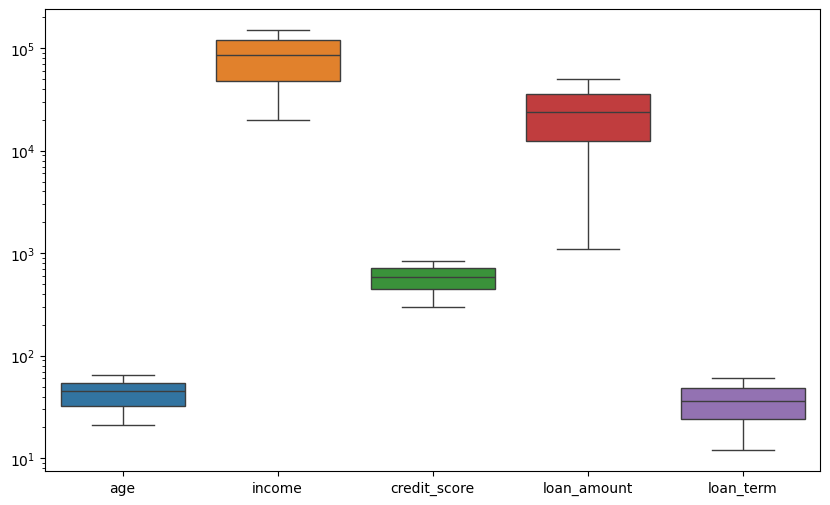

In [139]:
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.yscale('log')
plt.show()

In [140]:
df.isna().sum()

age                0
gender             0
income             0
employment_type    0
credit_score       0
loan_amount        0
loan_term          0
default            0
dtype: int64

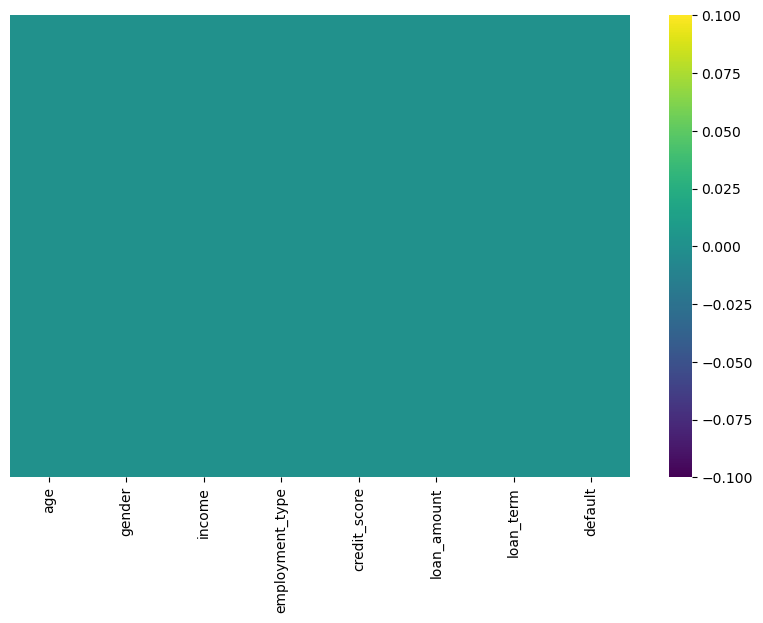

In [141]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),cmap='viridis',yticklabels=False)
plt.show()

In [142]:
df.duplicated().sum()

0

> <b> Data Has No missing values and duplicates,Also mean and median is almost similiar hence low outliers 

## Distribution of loan amounts

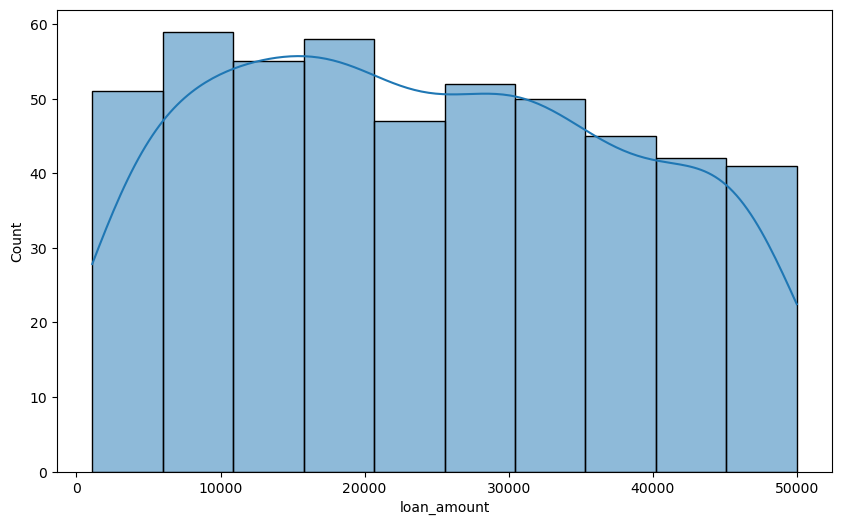

In [143]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='loan_amount',kde=True)
plt.show()

> <b> Most of loan amount lies b/w 10k and 20k </b>

## Average income of defaulters vs non-defaulters. 

In [144]:
nodf = df.loc[df['default'] == 'No', 'income']
nodf=pd.DataFrame(nodf)


In [145]:
len(nodf)

380

In [146]:
defu=df.loc[df['default']=='Yes','income']
defu=pd.DataFrame(defu)


In [147]:
len(defu)

120

In [148]:
x=nodf['income'].mean()
x

95482.6

> non default avg

In [149]:
y=defu['income'].mean()
y

49049.99166666667

> default avg

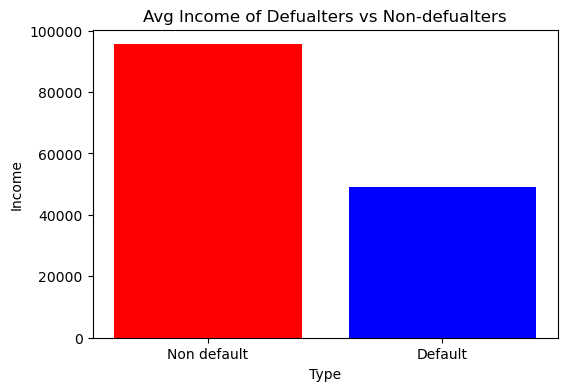

In [150]:
cat=['Non default','Default']
val=[x,y]

plt.figure(figsize=(6,4))
plt.bar(cat,val,color=['red','blue'])
plt.title("Avg Income of Defualters vs Non-defualters")
plt.xlabel("Type")
plt.ylabel("Income")
plt.show()

> <b> Non Defualters have more average income than defulters,

## Relationship between credit score and default 

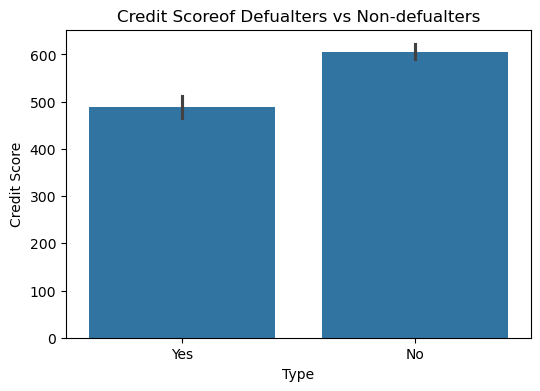

In [151]:
plt.figure(figsize=(6,4))
sns.barplot(data=df,x='default',y='credit_score')
plt.title("Credit Scoreof Defualters vs Non-defualters")
plt.xlabel("Type")
plt.ylabel("Credit Score")
plt.show()

> <b> Non-defualters have more credict scores than defualters

In [152]:
nodef=df.loc[df['default']=='No','credit_score']
nodef.describe().T

count    380.000000
mean     605.581579
std      150.031030
min      306.000000
25%      471.000000
50%      623.000000
75%      734.250000
max      849.000000
Name: credit_score, dtype: float64

> non-defualters

In [153]:
defu=df.loc[df['default']=='Yes','credit_score']
defu.describe().T

count    120.000000
mean     488.350000
std      135.755257
min      300.000000
25%      373.500000
50%      467.000000
75%      585.250000
max      830.000000
Name: credit_score, dtype: float64

> defualters

<h3 style="background-color:cyan"> Defaulters have significantly lower credit scores compared to the overall customer base, with a mean of ~488 and median of 467 versus ~606 and 623 overall. Most defaulters fall in the 374–585 range, whereas non-defaulters cluster higher around 600–700+. This shows a clear gap in creditworthiness, suggesting that lower credit scores are strongly associated with default risk, though some overlap exists since a few defaulters also have high scores.</h3>

#  Feature Engineering & Preprocessing

In [154]:
from sklearn.preprocessing import LabelEncoder

In [155]:
df['default'].unique()

array(['Yes', 'No'], dtype=object)

In [156]:
df['employment_type'].unique()

array(['Self-Employed', 'Salaried', 'Unemployed'], dtype=object)

In [157]:
df['gender'].unique()	

array(['Male', 'Female'], dtype=object)

In [158]:
le=LabelEncoder()
df['default']=le.fit_transform(df['default'])
for label,i in enumerate(le.classes_):
    print(f"{label}:{i}")

0:No
1:Yes


In [160]:
df['employment_type']=le.fit_transform(df['employment_type'])
for label,i in enumerate(le.classes_):
    print(f"{label}:{i}")

0:Salaried
1:Self-Employed
2:Unemployed


In [161]:
df['gender']=le.fit_transform(df['gender'])
for label,i in enumerate(le.classes_):
    print(f"{label}:{i}")

0:Female
1:Male


In [174]:
df.isna().sum()

age                    0
gender                 0
income                 0
employment_type        0
credit_score           0
loan_amount            0
loan_term              0
default                0
income_Scaled          0
credit_score_Scaled    0
loan_amount_Scaled     0
dtype: int64

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
ss=StandardScaler()


In [167]:
df['income_Scaled']=ss.fit_transform(df[['income']])

In [169]:
df['credit_score_Scaled']=ss.fit_transform(df[['credit_score']])

In [170]:
df['loan_amount_Scaled']=ss.fit_transform(df[['loan_amount']])

In [171]:
df

,age,gender,income,employment_type,credit_score,loan_amount,loan_term,default,income_Scaled,credit_score_Scaled,loan_amount_Scaled
0,59,1,28717,1,313,34453,48,1,-1.401814,-1.708593,0.727042
1,49,1,147449,1,803,19544,12,0,1.590543,1.457310,-0.337522
2,35,0,48699,0,530,13258,36,1,-0.898216,-0.306550,-0.786368
3,63,0,93686,0,383,31841,48,0,0.235575,-1.256321,0.540534
4,28,1,87661,0,429,49758,24,1,0.083729,-0.959114,1.819882
...,...,...,...,...,...,...,...,...,...,...,...
495,33,1,146944,0,787,1155,24,0,1.577816,1.353934,-1.650572
496,32,1,132726,1,423,2958,24,0,1.219485,-0.997880,-1.521831
497,51,1,101974,0,713,11693,60,0,0.444454,0.875818,-0.898116
498,22,0,125947,0,471,40112,48,0,1.048636,-0.687750,1.131118


# Predictive Modeling (Decision Tree) 

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [180]:
fet=['age','gender','income_Scaled','employment_type','credit_score_Scaled','loan_amount_Scaled']
x=df[fet]
y=df['default']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)
dt=DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=3)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)


In [182]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        79
           1       0.56      0.43      0.49        21

    accuracy                           0.81       100
   macro avg       0.71      0.67      0.68       100
weighted avg       0.80      0.81      0.80       100



In [204]:
dff=pd.DataFrame({ 'Feature':fet,'importance':dt.feature_importances_})
dff=dff.sort_values('importance',ascending=False)

<Axes: xlabel='importance', ylabel='Feature'>

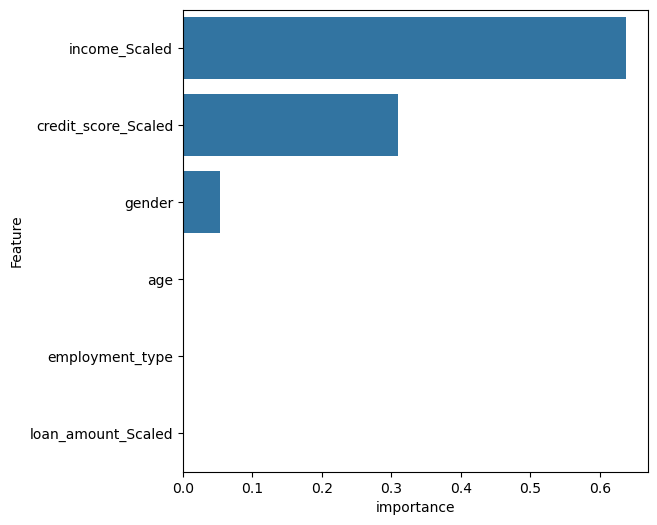

In [205]:
plt.figure(figsize=(6,6))
sns.barplot(data=dff,x='importance',y='Feature')



> income is the most importent feature

## Conclusion

<h3 style="background-color:'cyan'">The analysis shows that income is the most important feature in predicting loan default. Individuals’ income levels have a strong influence on whether they are likely to default, indicating that financial capacity is a key determinant. However, while income is highly predictive, it cannot solely determine default, as other factors such as credit score, employment type, and loan amount also play significant roles. A comprehensive model using all relevant features provides more accurate predictions than relying on income alone</h3>